In [2]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt  # For plotting
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import accuracy_score

In [3]:
# Initialize H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 mins 26 secs
H2O_cluster_timezone:,Asia/Kuala_Lumpur
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 24 days
H2O_cluster_name:,H2O_from_python_Huawei_25bvjv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.863 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
# Step 2: Load and Explore Data
# Load datasets
X_train = pd.read_csv("../04_modelling/dataset/X_train.csv")
y_train = pd.read_csv("../04_modelling/dataset/y_train.csv")
X_val = pd.read_csv("../04_modelling/dataset/X_val.csv")
y_val = pd.read_csv("../04_modelling/dataset/y_val.csv")
X_test = pd.read_csv("../04_modelling/dataset/X_test.csv")
y_test = pd.read_csv("../04_modelling/dataset/y_test.csv")

In [5]:
# Combine training features and target for H2O AutoML
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [6]:
# Convert to H2O Frames
train_h2o = h2o.H2OFrame(train_df)
val_h2o = h2o.H2OFrame(val_df)
test_h2o = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
# Define target and features
target = "yearly_compensation"
features = train_h2o.columns
if target in features:
    features.remove(target)

In [8]:
# Check data summary
print("Training Data Summary:")
train_h2o.describe()

Training Data Summary:


Rows:5459
Cols:51

,ml_spending,used_tpu,Total_Experience,demographics_COUNTprofileTable,demographics_MEANprofileTable_yearly_compensation,company_COUNTprofileTable,company_MEANprofileTable_yearly_compensation,company_SUMprofileTable_yearly_compensation,country_COUNTprofileTable,country_SUMprofileTable_yearly_compensation,jobTitle_SUMprofileTable_yearly_compensation,jobTitle_SUMprofileTable_yearly_compensation_1,mlIncorporation_SUMprofileTable_yearly_compensation,mlIncorporation_MEANprofileTable_yearly_compensation,PrimaryTool_SUMprofileTable_yearly_compensation,PrimaryTool_MEANprofileTable_yearly_compensation,RecommendedLanguage_SUMprofileTable_yearly_compensation,RecommendedLanguage_MEANprofileTable_yearly_compensation,IncomeCategory_SUMprofileTable_yearly_compensation,age,gender_Male,company_size,country_Algeria,country_Australia,country_Austria,country_Nigeria,country_Other,country_Philippines,country_Poland,country_Portugal,country_Republic_of_Korea,country_Russia,country_Saudi_Arabia,country_Singapore,country_Spain,country_Switzerland,country_Taiwan,country_Thailand,country_Tunisia,country_Turkey,country_Ukraine,country_United_States_of_America,country_Viet_Nam,job_title_Business_Analyst,job_title_Data_Analyst,job_title_Data_Engineer,job_title_Data_Scientist,job_title_Product/Project_Manager,job_title_Research_Scientist,job_title_Software_Engineer,yearly_compensation
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int
mins,-5.073214151002757,-4.986915629786675,-3.894034176423702,-4.626803917463832,-4.485160789575362,-4.697719812525946,-4.177191085597267,-4.489270330011596,-5.474562681728408,-4.141542218290927,-4.312797198084712,-3.640135585386583,-3.9156531768923344,-3.8090352815546336,-3.948373607951701,-6.633594637063434,-3.554863581010869,-3.6676969322076007,-4.58154777588761,-4.182098831765816,-4.945087032146247,-4.158391286783692,-4.129525464152223,-2.956127991412488,-3.309099336730281,-3.624885508492478,-4.969630300896252,-5.033903596696299,-3.5386477083792016,-4.420184254999469,-4.168450093896267,-4.125855910126183,-3.856805748582876,-4.107408970710599,-4.546294437727609,-3.791664434666988,-4.743266082092007,-3.6969835452361934,-4.476333448057696,-3.672761484346168,-3.3169862291510386,-2.990471642762147,-3.5763992584874185,-3.471249864028924,-2.514554877453015,-2.1795053058669813,-1.4953476643568728,-0.211262928713999,-0.1929108164798906,-0.1518463636541843,0.0
mean,-0.003377296744197873,-0.008395492689889886,-0.00012469694809002992,-0.01035154226995089,0.0037394333234852532,-0.0032719797218479976,-0.004223564022879654,-0.0030969986054931436,-0.007930048444353504,-0.014272447446954183,-0.011401307680057416,0.003381163321315585,-0.010496233527614333,-0.01008031830684686,-0.009583903537950623,0.0012660169500348264,0.009880261098446433,-0.00269898603019323,2.5584556922530697e-05,-0.0015476633985693098,-0.007047951781546629,0.0012954530505763725,0.012184540794283355,-0.005218221477880209,-0.003962401376109956,-0.0020463546342546057,-0.00423146190723855,-0.005157047548750889,0.007398474252734203,-0.006323640419355434,0.009063268330118057,-0.0022356159238555483,-0.0064200427519799375,-0.005383689458664042,-0.012404747101242718,0.01433426178874028,-0.009987254513806838,0.0008994458528694564,0.009436431220184109,-0.00414452204445641,-0.0030703035923405862,0.013519736896756748,-0.001578680102810357,-0.008244308868963176,0.006181237787700669,-0.004139823792625962,-0.0016791350125122035,-0.00036803019575168264,-0.0006041522292237774,-5.193256324336065e-05,10.382670818831283
maxs,7.269771021095883,7.460528071179854,6.782091584796228,7.441591933236912,6.002826818335985,4.806017107174871,4.496645242889465,5.000959400082108,6.018563119248007,4.642460463878098,4.799734330177638,4.576483809859401,4.152266969366401,4.177939068866628,5.422563471680

In [9]:
# Model Selection using AutoML
# Configure AutoML parameters
h2o_automl = H2OAutoML(
    max_models=5,             # Limit the number of models to explore
    seed=10,                   # Set seed for reproducibility
    # exclude_algos=["DeepLearning"],  # Exclude deep learning models
    verbosity="info",         # Enable detailed logs
    nfolds=0                  # Use validation set directly instead of k-fold CV
)

In [10]:
# Train the AutoML models with cross-validation
h2o_automl.train(x=features, y=target, training_frame=train_h2o, validation_frame=val_h2o)

AutoML progress: |█
22:21:04.138: Project: AutoML_2_20241226_222104
22:21:04.139: Cross-validation disabled by user: no fold column nor nfolds > 1.
22:21:04.139: Setting stopping tolerance adaptively based on the training frame: 0.0135345385323802
22:21:04.139: Build control seed: 10
22:21:04.140: training frame: Frame key: AutoML_2_20241226_222104_training_Key_Frame__upload_90a50537cbfa7a4de38633dde5ff405b.hex    cols: 51    rows: 5459  chunks: 2    size: 2195995  checksum: -217094960968714656
22:21:04.140: validation frame: Frame key: Key_Frame__upload_844053268d441faa4eac9b10b0564e6c.hex    cols: 51    rows: 1170  chunks: 1    size: 472638  checksum: 742896563949582232
22:21:04.141: leaderboard frame: Frame key: Key_Frame__upload_844053268d441faa4eac9b10b0564e6c.hex    cols: 51    rows: 1170  chunks: 1    size: 472638  checksum: 742896563949582232
22:21:04.141: blending frame: NULL
22:21:04.141: response column: yearly_compensation
22:21:04.141: fold column: null
22:21:04.141: weigh

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20241226_222104


GLM Model: summary
    family    link      regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.003221 )  nlambda = 30, lambda.max = 297.49, lambda.min = 0.003221, lambda.1se = -1.0  50                            50                             25                      AutoML_2_20241226_222104_training_Key_Frame__upload_90a50537cbfa7a4de38633dde5ff405b.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.5629835141183627
RMSE: 0.7503222735054336
MAE: 0.531198020576569
RMSLE: NaN
Mean Residual Deviance: 0.5629835141183627
R^2: 0.9901900777525096
Null degrees of freedom: 5458
Residual degrees of freedom: 5408
Null deviance: 313287.60065946577
Residual deviance: 3073.3270035721416
AIC: 12459.748473680002

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.5629106013657299
RMSE: 0.7502736843084195
MAE: 0.5422876406827093
RMSLE: NaN
Mean Residual Deviance: 0.5629106013657299
R^2: 0.9901983065827914
Null degrees of freedom: 1169
Residual degrees of freedom: 1119
Null deviance: 67193.05023418745
Residual deviance: 658.605403597904
AIC: 2751.9938574434773

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_test       alpha    iterations    training_rmse       training_deviance    training_mae       training_r2         validation_rmse     validation_deviance    validation_mae      validation_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  -------  ------------  ------------------  -------------------  -----------------  ------------------  ------------------  ---------------------  ------------------  ------------------
     2024-12-26 22:21:04  0.000 sec   1            .3E3      50            57.00687648119548   57.05073152084785   0.0
     2024-12-26 22:21:04  0.024 sec   2            .18E3     50            56.77546695153281   56.821168684662666  0.0
     2024-12-26 22:21:04  0.047 sec   3            .11E3     51            56.405817678251935  56.45443367818369   0.0
     2024-12-26 22:21:04  0.071 sec   4            .71E2     51            55.81822092484625   55.871413581892575  0.0
     2024-12-26 22:21:04  0.095 sec   5            .44E2     51            54.891462846596596  54.95162472380965   0.0      5             0.7503222735054336  0.5629835141183627   0.531198020576569  0.9901900777525096  0.7502736843084195  0.5629106013657299     0.5422876406827093  0.9901983065827914
     2024-12-26 22:21:04  0.118 sec   6            .27E2     51            53.4475348195516    53.517970533243535  0.0
     2024-12-26 22:21:05  0.139 sec   7            .17E2     51            51.240967830200084  51.32596514594014   0.0
     2024-12-26 22:21:05  0.165 sec   8            .11E2     51            47.96824029747466   48.072106161542294  0.0
     2024-12-26 22:21:05  0.185 sec   9            .66E1     51            43.32908803246352   43.45389633909804   0.0
     2024-12-26 22:21:05  0.206 sec   10           .41E1     51            37.17537543593723   37.31704958564624   0.0
---  ---                  ---         ---          ---       ---           ---                 ---                 ---      ---           ---                 ---                  ---                ---                 ---                 ---                    ---             

In [11]:
# Review Leaderboard
h2o_models = h2o.automl.get_leaderboard(h2o_automl, extra_columns="All")
h2o_models

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_2_20241226_222104,0.750274,0.562911,0.542288,nan,0.562911,939,0.005216,GLM
GBM_1_AutoML_2_20241226_222104,1.75533,3.08117,1.31074,nan,3.08117,7815,0.186574,GBM
GBM_2_AutoML_2_20241226_222104,2.07282,4.29657,1.45402,nan,4.29657,3615,0.116495,GBM
GBM_3_AutoML_2_20241226_222104,2.21117,4.88928,1.60271,nan,4.88928,5529,0.06762,GBM
DRF_1_AutoML_2_20241226_222104,3.08686,9.52873,2.37548,0.566647,9.52873,5405,0.033588,DRF


In [12]:
# Identify the best-performing model
best_model = h2o_automl.leader
print(f"Best Model: {best_model.model_id}")

Best Model: GLM_1_AutoML_2_20241226_222104


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\Users\Huawei\OneDrive - Universiti Malaya\Desktop\SEMESTER 7\WIE3007_Data-Mining\Group Project\data-mining-warehousing-wages-analysis\venv\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


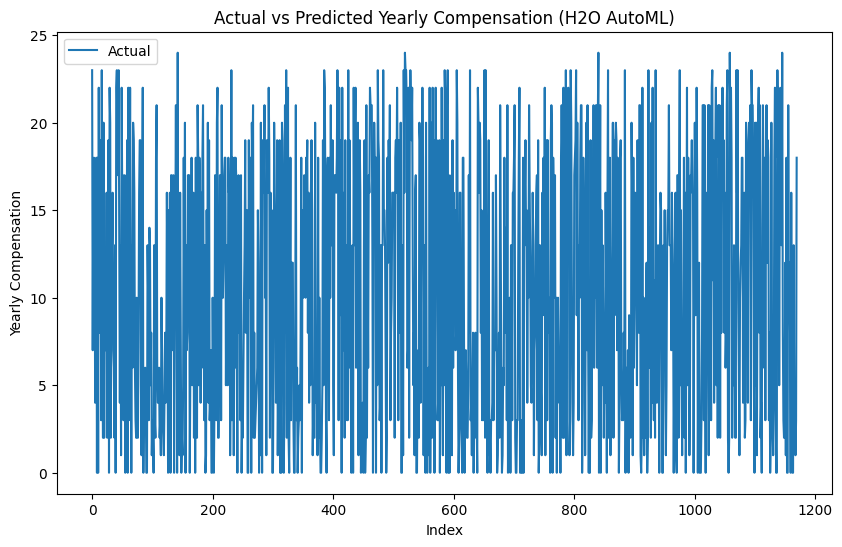

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
predictions = best_model.predict(test_h2o).as_data_frame().to_numpy().ravel()

# Convert `y_test` to a numpy array for consistency
actual = y_test.to_numpy().ravel()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': actual, 'Predicted': predictions})

# Option 1: Confusion Matrix
conf_matrix = confusion_matrix(actual, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix: Actual vs Predicted")
plt.show()

# Option 2: Bar Plot of Actual vs Predicted Counts
comparison_counts = comparison_df.value_counts().reset_index(name="Counts")
comparison_counts.columns = ['Actual', 'Predicted', 'Counts']

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_counts, x='Actual', y='Counts', hue='Predicted', palette='viridis')
plt.title("Actual vs Predicted Counts")
plt.xlabel("Actual Categories")
plt.ylabel("Count")
plt.legend(title="Predicted Categories")
plt.show()

# Option 3: Strip Plot for Detailed Visualization
plt.figure(figsize=(12, 6))
sns.stripplot(data=comparison_df, x='Actual', y='Predicted', jitter=True, palette='Set2', alpha=0.7)
plt.title("Actual vs Predicted Categories")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [14]:
# Flatten `actual_values` to match dimensions
actual_values = actual.flatten()

# Round predictions to nearest integer
rounded_predictions = predictions.round().astype(int)

# Compute accuracy
accuracy = accuracy_score(actual_values, rounded_predictions)
print(f"Accuracy on Test Data: {accuracy:.2f}")

Accuracy on Test Data: 0.61


In [15]:
# Evaluate model performance
performance = best_model.model_performance(test_h2o)
print("Model Performance on Test Data:")
print(performance)

Model Performance on Test Data:
ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.580239033646979
RMSE: 0.7617342276982039
MAE: 0.5441590865678606
RMSLE: NaN
Mean Residual Deviance: 0.580239033646979
R^2: 0.9898857737387018
Null degrees of freedom: 1169
Residual degrees of freedom: 1119
Null deviance: 67121.28489254977
Residual deviance: 678.8796693669655
AIC: 2787.467461661745


In [16]:
# Step 5: Advanced Techniques - Ensemble Model Analysis
# Extract specific models from the leaderboard for further analysis (e.g., Gradient Boosting)
# model_ids = h2o_models['model_id'].as_data_frame()['model_id'].tolist()
# gbm_model_id = next(mid for mid in model_ids if "GBM" in mid)
# gbm_model = h2o.get_model(gbm_model_id)

In [17]:
# Analyze GBM Model
# gbm_performance = gbm_model.model_performance(test_h2o)
# print("GBM Model Performance:")
# print(gbm_performance)


In [18]:
# Step 6: Save the best model
# best_model_path = h2o.save_model(best_model, path="../04_modelling/models/")
# print(f"Best model saved to: {best_model_path}")

In [19]:
# # Shutdown H2O cluster after processing
# h2o.shutdown(prompt=False)

In [20]:
# # Step 3: Model Training with AutoML
# from h2o.automl import H2OAutoML

# # Configure AutoML parameters for model training
# h2o_automl = H2OAutoML(
#     max_models=20,             # Train up to 20 models for comprehensive exploration
#     seed=42,                   # Ensure reproducibility
#     # include_algos=["GLM", "GBM", "XGBoost"],  # Focus on specific algorithms for interpretability
#     balance_classes=True,      # Mitigate class imbalance if applicable
#     # nfolds=5,                  # Use 5-fold cross-validation to prevent overfitting
#     stopping_metric="RMSE",    # Early stopping based on RMSE
#     stopping_tolerance=0.001,  # Stop if RMSE improvement is less than this
#     stopping_rounds=5          # Allow 5 rounds of no improvement before stopping
# )

# # Train the AutoML models
# h2o_automl.train(x=features, y=target, training_frame=train_h2o, validation_frame=val_h2o)

# # Review the leaderboard
# leaderboard = h2o_automl.leaderboard
# print("AutoML Leaderboard:")
# print(leaderboard)

In [21]:
# # Shutdown H2O cluster after processing
h2o.cluster().shutdown()

H2O session _sid_bcf6 closed.
